# HubSpot Sales Hub
### Product Insights on Week 1 Customer Churn Analysis
#### This Python notebook is used to explore the raw data and perform the necessary data transformations and manipulations, which will be used throughout analysis and discussion.

In [31]:
# Importing the required python packages and/or libraries

import types
import pandas as pd
from datetime import datetime
from botocore.client import Config
import ibm_boto3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Data Prepartation and Transformation

In [32]:
# Following code is used add the raw data file analyze_me.csv from IBM Cloud storage as Pandas dataframe for the project

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e17d0001c53e4ba194e7450f972d4307 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='###################',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e17d0001c53e4ba194e7450f972d4307.get_object(Bucket='hubspotsaleshubproductinsights-donotdelete-pr-qljlxtow4d9xpc',Key='HubSpot_Data_week1_churn.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data = pd.read_csv(body) #Filename with loaction can be replaced here, in case required

#### Quick summary of the raw data

In [33]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 10 columns):
stat_week                           6456 non-null int64
m                                   6456 non-null int64
d                                   6456 non-null int64
user id                             6456 non-null int64
stats_trackers_created              6456 non-null int64
stats_sent_notifications_desktop    6456 non-null int64
stats_gmail_insights_viewed         6456 non-null int64
stats_insights_viewed               6456 non-null int64
stats_activities_zapier             6456 non-null int64
stats_stream_viewed                 6456 non-null int64
dtypes: int64(10)
memory usage: 504.5 KB


In [34]:
# Looking at some basic statistics for the different stats fields
df_data.describe()

,stat_week,m,d,user id,stats_trackers_created,stats_sent_notifications_desktop,stats_gmail_insights_viewed,stats_insights_viewed,stats_activities_zapier,stats_stream_viewed
count,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.0,6456.000000
mean,39.674566,9.717937,15.006196,3228.500000,1.655514,2.394362,3.107497,0.013011,0.0,3.236679
std,1.300972,0.450039,9.084164,1863.831001,2.077874,5.849970,10.531730,0.290545,0.0,2.790333
min,38.000000,9.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,39.000000,9.000000,7.000000,1614.750000,1.000000,1.000000,0.000000,0.000000,0.0,2.000000
50%,40.000000,10.000000,15.000000,3228.500000,1.000000,1.000000,1.000000,0.000000,0.0,3.000000
75%,41.000000,10.000000,24.000000,4842.250000,2.000000,2.000000,3.000000,0.000000,0.0,4.000000
max,42.000000,10.000000,30.000000,6456.000000,66.000000,293.000000,412.000000,16.000000,0.0,50.000000


*None of the attributes in the raw data contain NULL values.*

#### Modyfying data types of certain attributes

In [35]:
# Renaming 'user id' column name to replace the blank space with an _

df_data.rename(columns = {'user id':'user_id'}, inplace = True)

In [36]:
# Changing the datatype of the fields 'stat_week', 'm', 'd' and 'user_id' to String objects in order to treat them as dimensions

convert_dict = {'stat_week': str, 
                'm': str,
                'd': str,
                'user_id': str
               } 
  
df_data = df_data.astype(convert_dict) 

#### Introducing new attributes in the raw data

In [37]:
# Creating a new field for 'date' by combining m and d values, Year 1900 is assigned by default

df_data['date']=df_data['m']+'/'+df_data['d']

for i in df_data.index:
    df_data['date'][i]=datetime.strptime(df_data['date'][i], '%m/%d')
    
df_data['date']=pd.to_datetime(df_data['date'])

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [38]:
# Creating a field to store the total count of actions performed by each user

df_data['total_actions']=df_data['stats_trackers_created']+df_data['stats_sent_notifications_desktop']+df_data['stats_gmail_insights_viewed']+df_data['stats_insights_viewed']+df_data['stats_activities_zapier']+df_data['stats_stream_viewed']

df_data.head()

,stat_week,m,d,user_id,stats_trackers_created,stats_sent_notifications_desktop,stats_gmail_insights_viewed,stats_insights_viewed,stats_activities_zapier,stats_stream_viewed,date,total_actions
0,38,9,22,6284,1,1,1,0,0,4,1900-09-22,7
1,38,9,22,6285,1,1,0,0,0,3,1900-09-22,5
2,38,9,22,6286,2,1,2,0,0,2,1900-09-22,7
3,38,9,22,6287,2,1,6,0,0,5,1900-09-22,14
4,38,9,22,6288,14,14,23,0,0,2,1900-09-22,53


### Data Exploration

In [39]:
# Looking at some basic statistics for the stats fields
df_data.describe()

,stats_trackers_created,stats_sent_notifications_desktop,stats_gmail_insights_viewed,stats_insights_viewed,stats_activities_zapier,stats_stream_viewed,total_actions
count,6456.000000,6456.000000,6456.000000,6456.000000,6456.0,6456.000000,6456.000000
mean,1.655514,2.394362,3.107497,0.013011,0.0,3.236679,10.407063
std,2.077874,5.849970,10.531730,0.290545,0.0,2.790333,14.946889
min,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
25%,1.000000,1.000000,0.000000,0.000000,0.0,2.000000,5.000000
50%,1.000000,1.000000,1.000000,0.000000,0.0,3.000000,7.000000
75%,2.000000,2.000000,3.000000,0.000000,0.0,4.000000,11.000000
max,66.000000,293.000000,412.000000,16.000000,0.0,50.000000,451.000000


In [40]:
df_data.stat_week.unique()

array(['38', '39', '40', '41', '42'], dtype=object)

*Data provided is for 5 weeks.*

In [41]:
df_data.m.unique()

array(['9', '10'], dtype=object)

*Data provided spans over the month of September and October.*

In [42]:
df_data.d.unique()

array(['22', '23', '24', '25', '26', '27', '28', '29', '30', '1', '2',
       '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', '20', '21'], dtype=object)

*It was also observed, that the data is not for all days of the two months. It ranges from Sep 22nd to Oct 26th.*

In [43]:
# Cummalative count of records per week.
df_data.groupby('stat_week').count()

,m,d,user_id,stats_trackers_created,stats_sent_notifications_desktop,stats_gmail_insights_viewed,stats_insights_viewed,stats_activities_zapier,stats_stream_viewed,date,total_actions
stat_week,,,,,,,,,,,
38,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
39,1683,1683,1683,1683,1683,1683,1683,1683,1683,1683,1683
40,1543,1543,1543,1543,1543,1543,1543,1543,1543,1543,1543
41,998,998,998,998,998,998,998,998,998,998,998
42,762,762,762,762,762,762,762,762,762,762,762


In [44]:
df_data.stat_week.value_counts(normalize=1)

39    0.260688
40    0.239002
38    0.227695
41    0.154585
42    0.118030
Name: stat_week, dtype: float64

*Nearly 70% of the customers that churned are from weeks 38, 39 and 40.*

In [45]:
df_data.groupby('stat_week').sum()

,stats_trackers_created,stats_sent_notifications_desktop,stats_gmail_insights_viewed,stats_insights_viewed,stats_activities_zapier,stats_stream_viewed,total_actions
stat_week,,,,,,,
38,2296,2853,4039,22,0,4869,14079
39,2762,4725,5858,13,0,5797,19155
40,2492,3634,4719,15,0,4777,15637
41,1730,2265,2822,15,0,3063,9895
42,1408,1981,2624,19,0,2390,8422


*Quite evidently it can be seen that the feature 'Gmail insights viewed' has the highest counts, showing it was the most popular.*

*Also, none of the users tried using any 'Zapier integrations' and very small number of actions represented the 'Insights viewed' feature.*

#### Summary of stats grouped by week, month and date

In [46]:
df_data.groupby(['stat_week','m','d']).sum()

stats_trackers_created  stats_sent_notifications_desktop  \
stat_week m  d                                                              
38        9  22                     313                               380   
             23                     403                               478   
             24                     364                               399   
             25                     471                               532   
             26                     385                               631   
             27                     235                               270   
             28                     125                               163   
39        10 1                      638                              1426   
             2                      435                               708   
             3                      461                               772   
             4                      338                               500   
             5                      305                               489   
          9  29                     279                               359   
             30                     306                               471   
40        10 10                     425                               548   
             11                     272                               412   
             12                     231                               419   
             6                      420                               624   
             7                      418                               608   
             8                      271                               397   
             9                      455                               626   
41        10 13                     229                               313   
             14                     297                               412   
             15                     349                               489   
             16                     447                               540   
             17                     138                               143   
             18                     122                               173   
             19                     148                               195   
42        10 20                     202                               305   
             21                     210                               299   
             22                     291                               486   
             23                     271                               353   
             24                     265                               341   
             25                      78                               100   
             26                      91                                97   

                 stats_gmail_insights_viewed  stats_insights_viewed  \
stat_week m  d                                                        
38        9  22                          568                      4   
             23                          696                      0   
             24                          542                      0   
             25                          909                     16   
             26                          806                      2   
             27                          356                      0   
             28                          162                      0   
39        10 1                          1647                      8   
             2                           890                      0   
             3                          1283                      0   
             4                           345                      3   
             5                           452                      1   
          9  29                          503                      0   
             30                          738                      1   
40        10 10                

### Visualizing the Stats

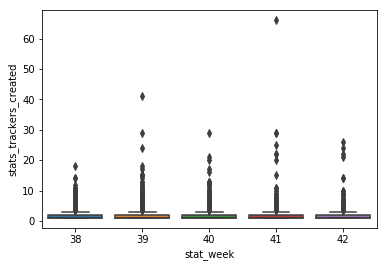

In [47]:
sns.boxplot(x="stat_week", y="stats_trackers_created", data=df_data)

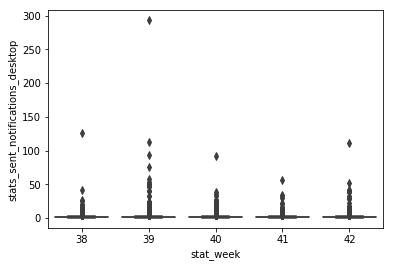

In [48]:
sns.boxplot(x="stat_week", y="stats_sent_notifications_desktop", data=df_data)

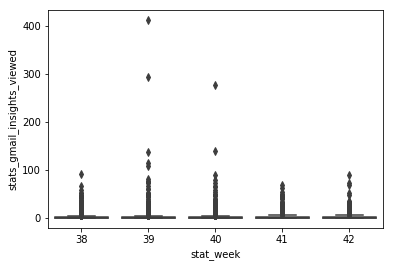

In [49]:
sns.boxplot(x="stat_week", y="stats_gmail_insights_viewed", data=df_data)

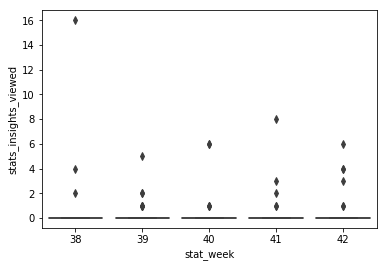

In [50]:
sns.boxplot(x="stat_week", y="stats_insights_viewed", data=df_data)

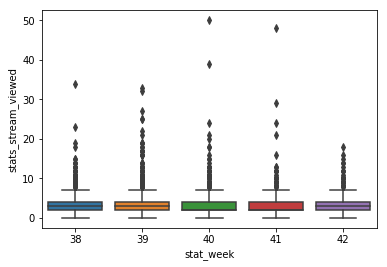

In [51]:
sns.boxplot(x="stat_week", y="stats_stream_viewed", data=df_data)

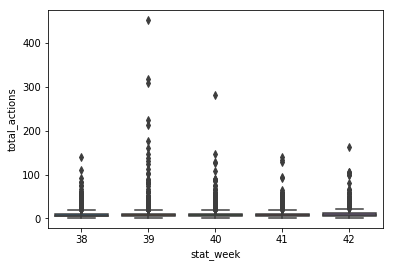

In [52]:
sns.boxplot(x="stat_week", y="total_actions", data=df_data)

*From the above Box Plots, we could see that the spread of the data set i.e. the Interquartile range and the mean was very small. Moreover, most of the higher values got categorized as Outliers as they are seen beyond the boxes.*

In [53]:
df_data.corr(method ='pearson')

,stats_trackers_created,stats_sent_notifications_desktop,stats_gmail_insights_viewed,stats_insights_viewed,stats_activities_zapier,stats_stream_viewed,total_actions
stats_trackers_created,1.000000,0.537548,0.323443,0.008708,NaN,0.151323,0.605724
stats_sent_notifications_desktop,0.537548,1.000000,0.248873,0.015848,NaN,0.102987,0.661004
stats_gmail_insights_viewed,0.323443,0.248873,1.000000,0.019946,NaN,0.047449,0.856225
stats_insights_viewed,0.008708,0.015848,0.019946,1.000000,NaN,0.061171,0.052325
stats_activities_zapier,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stats_stream_viewed,0.151323,0.102987,0.047449,0.061171,NaN,1.000000,0.282649
total_actions,0.605724,0.661004,0.856225,0.052325,NaN,0.282649,1.000000


*From the correlations drawn between each of the features, it can be seen that 'stats_trackers_created' and 'stats_sent_notifications_desktop' were the most correlated feaures in the data set having the pearson correlation coefficient of 0.53 (excluding the correlations involving total_actions).*

In [54]:
df_data.total_actions.value_counts().sort_index()

1       12
2       85
3      523
4      846
5      841
6      733
7      588
8      445
9      379
10     273
11     248
12     190
13     155
14     120
15      99
16      99
17      90
18      68
19      58
20      47
21      38
22      39
23      40
24      34
25      37
26      26
27      21
28      20
29      12
30      18
      ... 
90       2
91       1
93       1
94       1
98       1
99       1
101      1
104      2
105      2
108      1
110      1
112      1
123      1
126      1
128      2
130      1
132      1
138      1
140      1
141      1
146      2
160      1
162      1
176      1
212      1
223      1
281      1
308      1
317      1
451      1
Name: total_actions, Length: 108, dtype: int64

*From the above spread of counts for the total_actions, it is seen that close to 75% users have less than 10 actions in total; 25% of the users recorded actions between 10 and 50.* 

#### Segmenting the users based on the no. of actions recorded (Based on assumption)

In [55]:
cut_labels = ['Visitor', 'Explorer', 'Core', 'Power'] #Assumption of the different segments of users as per the data
cut_bins = [0, 10, 50, 100, 500]
df_data['cust_cat'] = pd.cut(df_data['total_actions'], bins=cut_bins, labels=cut_labels)

#### Statistics on the total actions according to the user segment

In [56]:
df_data[['cust_cat','total_actions']].groupby('cust_cat').describe()

total_actions                                                      \
                 count        mean        std    min    25%    50%     75%   
cust_cat                                                                     
Visitor         4725.0    5.831746   2.088497    1.0    4.0    6.0    7.00   
Explorer        1631.0   18.504598   8.492426   11.0   12.0   16.0   22.00   
Core              72.0   67.152778  14.368059   51.0   55.0   61.0   80.25   
Power             28.0  164.892857  82.404306  101.0  111.5  135.0  165.50   

                 
            max  
cust_cat         
Visitor    10.0  
Explorer   50.0  
Core       99.0  
Power     451.0

In [57]:
df_data_category = df_data[['cust_cat','total_actions']].groupby('cust_cat').sum()
df_data_category.head()

,total_actions
cust_cat,
Visitor,27555
Explorer,30181
Core,4835
Power,4617


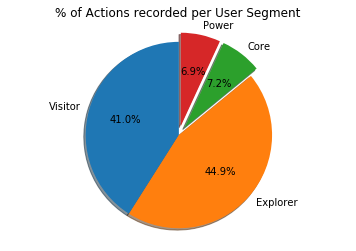

In [60]:
# Pie chart
labels = df_data_category.index
sizes = df_data_category.total_actions
explode = (0., 0, 0.1, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('% of Actions recorded per User Segment')
#plt.legend()
plt.show()

In [59]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='977a96c5-6d44-47e4-beb2-1af83dd27266', project_access_token='p-9c2683c77ad3b9473e63d5056dcf8adbc46d7a5b')
pc = project.project_context
#project.save_data(file_name = "HubSpot_Data_week1_churn_modified.csv", data=df_data.to_csv(index=False))